In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.grid_search import GridSearchCV 
from xgboost.sklearn import XGBClassifier

In [3]:
# Load data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

y = train['target']
X = train.loc[:,'var_0':'var_199']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

In [4]:
# Step 0. Prepare data 
dtrain = xgb.DMatrix(X_train.head(4000), y_train.head(4000))
dtest = xgb.DMatrix(X_test, y_test)

In [ ]:
# Step 1. Fix learning rate and choose the n_estimators
params = {'eta':0.3, 'max_depth':3, 'min_child_weight':1, 'subsample':0.8,
         'colsample_bytree':0.8, 'objective':'binary:logistic', 'scale_pos_weight': 1}
cvresult = xgb.cv(params, dtrain, num_boost_round = 1000, early_stopping_rounds = 50, 
                  nfold = 5, metrics='auc', show_stdv=False)

# Extract the best n_estimators 
num_estimators = cvresult.shape[0]
num_estimators

In [6]:
# Step 2. Tune max_depth and min_child_weight
param_test1 = {
 'max_depth': [3,5,7],
 'min_child_weight': [1,3,5]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.3, n_estimators=num_estimators, max_depth=3,
                                                  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, 
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1), 
                        param_grid = param_test1, scoring='roc_auc', n_jobs=4, iid=False, cv=5)
gsearch1.fit(X_train.head(4000), y_train.head(4000))
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.82051, std: 0.02880, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.81565, std: 0.02551, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.81051, std: 0.03361, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.80690, std: 0.02744, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.80644, std: 0.04074, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.81643, std: 0.02432, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.81223, std: 0.02200, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.81427, std: 0.02995, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.81136, std: 0.02242, params: {'max_depth': 7, 'min_child_weight': 5}],
 {'max_depth': 3, 'min_child_weight': 1},
 0.8205072441583315)

In [8]:
# Step 3. Tune gamma
param_test1 = {
    'gamma': [0,0.1,0.2,0.3,0.4]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.3, n_estimators=num_estimators, max_depth=3,
                                                  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, 
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1), 
                        param_grid = param_test1, scoring='roc_auc', n_jobs=4, iid=False, cv=5)
gsearch1.fit(X_train.head(4000), y_train.head(4000))
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.82051, std: 0.02880, params: {'gamma': 0},
  mean: 0.81582, std: 0.03409, params: {'gamma': 0.1},
  mean: 0.81730, std: 0.02274, params: {'gamma': 0.2},
  mean: 0.82180, std: 0.03439, params: {'gamma': 0.3},
  mean: 0.81800, std: 0.02542, params: {'gamma': 0.4}],
 {'gamma': 0.3},
 0.8217999801742675)

In [ ]:
# Step 3.5 Adjust num_estimators after tuning max_depth, min_child_weight and gamma
params = {'eta':0.3, 'max_depth':3, 'min_child_weight':1, 'gamma':0.3, 'subsample':0.8,
         'colsample_bytree':0.8, 'objective':'binary:logistic', 'scale_pos_weight': 1}
cvresult = xgb.cv(params, dtrain, num_boost_round = 1000, early_stopping_rounds = 50, 
                  nfold = 5, metrics='auc', show_stdv=False)
num_estimators = cvresult.shape[0]
num_estimators

In [10]:
# Step 4. Tune subsample and colsample_bytree
param_test1 = {
    'subsample': [0.6,0.7,0.8,0.9],
    'colsample_bytree': [0.6,0.7,0.8,0.9]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.3, n_estimators=num_estimators, max_depth=3,
                                                  min_child_weight=1, gamma=0.3, subsample=0.8, colsample_bytree=0.8, 
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1), 
                        param_grid = param_test1, scoring='roc_auc', n_jobs=4, iid=False, cv=5)
gsearch1.fit(X_train.head(4000), y_train.head(4000))
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.81224, std: 0.02326, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: 0.80883, std: 0.03782, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: 0.82267, std: 0.01584, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: 0.81639, std: 0.02674, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: 0.80371, std: 0.02491, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: 0.80644, std: 0.02917, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: 0.80125, std: 0.02467, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: 0.82408, std: 0.02976, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: 0.80308, std: 0.02893, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: 0.81270, std: 0.03009, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: 0.82085, std: 0.03511, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: 0.80665, std: 0.03026, params: {'colsample_bytree': 0.8, 'subsample'

In [11]:
# Step 5. Tune regularization term (L1-norm)
param_test1 = {
    'reg_alpha': [0, 0.0001, 0.01, 0.1, 1, 100]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.3, n_estimators=num_estimators, max_depth=3,
                                                  min_child_weight=1, gamma=0.3, subsample=0.9, colsample_bytree=0.7, 
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1), 
                        param_grid = param_test1, scoring='roc_auc', n_jobs=4, iid=False, cv=5)
gsearch1.fit(X_train.head(4000), y_train.head(4000))
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.82408, std: 0.02976, params: {'reg_alpha': 0},
  mean: 0.82407, std: 0.02975, params: {'reg_alpha': 0.0001},
  mean: 0.81063, std: 0.03288, params: {'reg_alpha': 0.01},
  mean: 0.81971, std: 0.03666, params: {'reg_alpha': 0.1},
  mean: 0.80825, std: 0.02967, params: {'reg_alpha': 1},
  mean: 0.69961, std: 0.03980, params: {'reg_alpha': 100}],
 {'reg_alpha': 0},
 0.8240758381296732)

In [ ]:
# Step 6. reduce learning rate and determine the num_estimators
params = {'eta':0.05, 'max_depth':3, 'min_child_weight':1, 'gamma':0.3, 'subsample':0.9,
         'colsample_bytree':0.7, 'objective':'binary:logistic',  'scale_pos_weight': 1}
cvresult = xgb.cv(params, dtrain, num_boost_round = 1000, early_stopping_rounds = 50, 
                  nfold = 5, metrics='auc', show_stdv=False)
num_estimators = cvresult.shape[0]
num_estimators

In [13]:
# Step 7. Fit the model
dtrain = xgb.DMatrix(X_train, y_train)
params = {'eta':0.05, 'max_depth':3, 'min_child_weight':1, 'gamma':0.3, 'subsample':0.9,
         'colsample_bytree':0.7, 'objective':'binary:logistic',  'scale_pos_weight': 1}
bst = xgb.train(params, dtrain, num_boost_round = num_estimators)

In [14]:
# Model Performance (ROC-AUC)
xgb_preds = bst.predict(dtest)
fpr, tpr, threshold = roc_curve(y_test, xgb_preds)
roc_auc = auc(fpr, tpr)

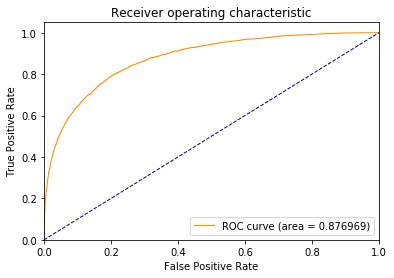

In [16]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.6f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [19]:
dtest2 = xgb.DMatrix(test.loc[:,'var_0':'var_199'])
# submission = pd.DataFrame({'ID_code': test['ID_code'], 'target': bst.predict(dtest2)})
# submission.to_csv('sample_submission_2.csv', index = False)